Noise Data Feature Engineering

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
data = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v1_feature_engineering_data.csv", sep=',', low_memory=False)
#data_comb = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v2_Sorted_Database.csv", sep=',', low_memory=False)


In [0]:
data.shape

(19954, 438)

## Analyzing Missing Values


In [0]:
#Percentage of samples having missing values
data.isnull().sum(axis=1).sort_values(ascending=False)

8724     201
4710     201
10586    200
1023     198
8736     197
        ... 
10680      0
10679      0
10678      0
10677      0
9976       0
Length: 19954, dtype: int64

In [0]:
# total missing values
data.isnull().sum(axis=1)[data.isnull().sum(axis=1) > 0].shape[0]

6705

In [0]:

# check columns with missing values
pd.set_option('display.max_rows', 500)
# in percentage
#100 * (data.isnull().sum().sort_values(ascending=False) / data.shape[0])
data.isnull().sum().sort_values(ascending=False)

LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D         3111
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING         2919
LX_PSC_P1MNF_COMPRESSOR_LOAD_PHASE_COUNTER          1583
LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT          988
LX_PSC_P1ASI_COOLANT_PUMP_ACTIVATION_TIME            988
LX_PSC_P1I80_TOP_VALUE_OF_ENGINE_SPEED_IN_O          987
X_PSC_P1ATR_OIL_DEGRADATION_LAST_OLC_DISTA           941
X_PSC_P1ATS_OIL_DEGRADATION_LAST_OLC_HOURS           941
X_PSC_P1ATV_OIL_LIFE_AT_PAST_DUE                     941
X_PSC_P1LJQ_ADBLUE_ADAPTION_FACTOR_INITIAL           897
X_PSC_P1JBT_SCR_OPERATOR_INDUCEMENT_REASON           897
X_PSC_P1IOY_SOOT_MASS_REPORTED_BY_KALMAN_F           897
X_PSC_P1IT7_NUMBER_OF_TIMES_THE_ESTIMATED_           897
X_PSC_P1JAZ_RATED_ENGINE_POWER                       897
X_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS           897
SX_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS          897
X_PSC_P1JR0_AUTOMATIC_CRYSTALS_REGENERATIO           896
X_PSC_P1IT2_AFTERTREATMENT_REGE

In [0]:
# evaluate the missing values
# LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D - it means the number of times the vehicle was started during its lifetime
data['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'].describe()

count    16843.000000
mean      7754.509044
std       5235.361991
min          0.000000
25%       4019.872549
50%       6695.207547
75%      10288.343521
max      40433.000000
Name: LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D, dtype: float64

In [0]:
temp = data[data['T_CHASSIS'] == 'O-695072']


In [0]:
# find which features this termilogy has a relation ship with - LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D
temp.corr()['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'].sort_values(ascending=False)

LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D         1.000000e+00
LX_PST_P1E0L_1072_MV3                               9.999498e-01
LX_PST_P1E0L_1074_MV5                               9.999081e-01
LX_PSC_P1AQF_GEARBOX_MOVEMENT_GEAR1R_NEUTRA         9.999061e-01
LX_PSC_P1AQD_GEARBOX_MOVEMENT_GEAR1R_GEAR1          9.998716e-01
LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG     9.998538e-01
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_3        9.998178e-01
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_4        9.998112e-01
LX_PSC_P1E8Y_TOTAL_NUMBER_OF_PARK_BRAKE_APP         9.997907e-01
LX_PSC_P1E0O_TOTAL_NUMBER_OF_PARK_BRAKE_MAN         9.997841e-01
LX_PSC_P1AS3_MAIN_LOG_COASTING_DISTANCE             9.997574e-01
LX_PSC_P1E0N_TOTAL_NUMBER_OF_PARK_BRAKE_MAN         9.997478e-01
LX_PSC_P1AQN_GEARBOX_MOVEMENT_RANGE_HIGH            9.997192e-01
LX_PSC_P1AQM_GEARBOX_MOVEMENT_RANGE_LOW             9.997185e-01
LX_PSC_P1ATA_MAIN_LOG_COASTING_TIME                 9.997094e-01
LX_PMU_P1FH1_SLOPE_X_INDE

In [0]:
# find which features this termilogy has a relation ship with - LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D
data.corr()['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'].sort_values(ascending=False)

LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D         1.000000
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING         0.987180
LX_PST_P1H6B_134_IGNCNTR                            0.776870
LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG     0.749289
LX_PST_P1H6B_149_FUELCOMP                           0.746538
LX_PSC_P1ATF_MAIN_LOG_KEY_ON_TIME                   0.742945
LX_PST_P1E0L_1074_MV5                               0.718734
LX_PSC_P1E8Y_TOTAL_NUMBER_OF_PARK_BRAKE_APP         0.711446
X_PST_P1C2O_365_VDLCOMPRTOTALTIME_LOG               0.701637
LX_PSC_P1ASV_MAIN_LOG_DRIVE_TIME                    0.695602
LX_PST_P1C2O_362_VDLCOMPRDISJUNCTIONTIME_LOG        0.694822
LX_PSC_P1E0N_TOTAL_NUMBER_OF_PARK_BRAKE_MAN         0.694463
LX_PST_P1E0L_1072_MV3                               0.679352
AGE_MONTHS                                          0.679161
AGE_YEARS                                           0.678927
LX_PSC_P1BB0_TOTAL_ENGINE_TIME                      0.676708
LX_PSC_P1AQF_GEARBOX_MOV

In [0]:
temp['LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING'].describe()

count       68.000000
mean     13915.156880
std       3217.625722
min       7922.718186
25%      11309.682292
50%      14197.666667
75%      16685.000000
max      18780.194212
Name: LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING, dtype: float64

In [0]:
temp[['BIWEEK_SEND_DATE', 'LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING', 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG','RUL']]

,BIWEEK_SEND_DATE,LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D,LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING,LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG,RUL
11135,2016-05-01,8122.544602,7922.718186,10264.003204,222.0
11136,2016-05-15,8300.498617,8108.418996,10430.604264,208.0
11137,2016-06-01,8516.585635,8333.912838,10632.905551,191.0
11138,2016-06-15,8694.539651,8519.613648,10799.506610,177.0
11139,2016-07-01,8897.915668,8731.843145,10989.907822,161.0
11140,2016-07-15,9075.869683,8917.543956,11156.508881,147.0
11141,2016-08-01,9291.956701,9143.037797,11358.810168,130.0
11142,2016-08-15,9469.910717,9328.738607,11525.411228,116.0
11143,2016-09-01,9685.997735,9554.232448,11727.712515,99.0
11144,2016-09-15,9863.951750,9739.933258,11894.313575,85.0


In [0]:
# this feature ['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG'] has a good relationship with -
# - LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D, LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING
data['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG'].isnull().value_counts()

False    19776
True       178
Name: LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG, dtype: int64

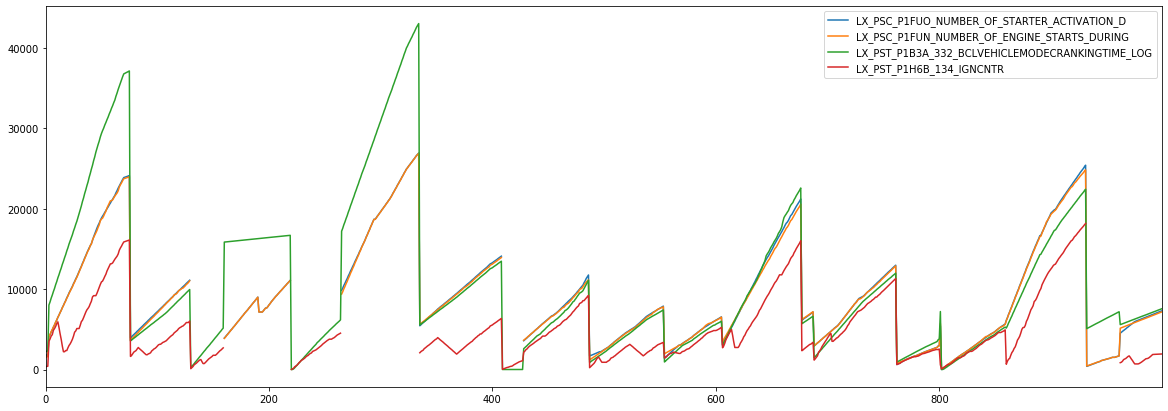

In [0]:
data[['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING', 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG', 'LX_PST_P1H6B_134_IGNCNTR']][:1000].plot(figsize= (20,7))
                            

In [0]:
# we can use linear regression to fill the missing values in 'LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D' and 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING'
# we will create a new data from
data_reg_1 = data[['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING', 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG']]
data_reg_1.shape


(19954, 3)

In [0]:
data_reg_1.isnull().sum().sort_values(ascending=False)

LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D        3111
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING        2919
LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG     178
dtype: int64

In [0]:
# we remove na from both LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING and LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG
data_reg = data_reg_1.dropna(axis=0, subset=['LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING', 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG'])

In [0]:
# here I will only extract all the values that are not nan for the 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG' feature
#data_reg[:15000].isnull().sum().sort_values(ascending=False)
#data_reg = data_reg.dropna(axis=0, subset=['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG'])

In [0]:
data_reg.isnull().sum().sort_values(ascending=False)

LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D        120
LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG      0
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING          0
dtype: int64

In [0]:
# now we can use linear regression to predict the missing values for 'LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'
data_reg.shape

(16927, 3)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [0]:
train = data_reg[data_reg['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'].isnull() == False]
test = data_reg[data_reg['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'].isnull() == True]

In [0]:
X_train = train[['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING']].values
y_train = train['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'].values

In [0]:
X_test = test[['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING']].values
y_test = test['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'].values

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X_train.shape

(16807, 2)

In [0]:
reg = LinearRegression(normalize=True).fit(X_train, y_train)

In [0]:
# score for the linear regression
reg.score(X_train, y_train)

0.9756472336035774

In [0]:
# evaluate the predictions
predictions = reg.predict(X_test)

In [0]:
# using linear regression
#print(mean_absolute_error(y_test, predictions), np.sqrt(mean_squared_error(y_test, predictions)))

In [0]:
predictions.shape

(120,)

In [0]:
# now we can should update the dataframe missing values with this new ones.
predictions
# update the 
data_reg.loc[data_reg['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'].isnull() == True, 'LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'] = predictions

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
data_reg_1.loc[data_reg_1['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'].isnull() == True, 'LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'].shape

(3111,)

In [0]:
data_reg.isnull().sum().sort_values(ascending=False)

LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG    0
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING        0
LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D        0
dtype: int64

In [0]:
# now update the original data
data_reg_1.update(data_reg)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [0]:
data_reg_1.isnull().sum().sort_values(ascending=False)

LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D        2991
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING        2919
LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG     178
dtype: int64

In [0]:
data_reg_1.dropna(axis=0, subset=['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG']).isnull().sum().sort_values(ascending=False)

LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING        2849
LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D        2849
LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG       0
dtype: int64

In [0]:
# update those as well
data_reg = data_reg_1.dropna(axis=0, subset=['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG'])
train = data_reg[data_reg['LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING'].isnull() == False]
test = data_reg[data_reg['LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING'].isnull() == True]

X_train = train[['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG', 'LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D']].values
y_train = train['LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING'].values

X_test = test[['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG', 'LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D']].values
y_test = test['LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING'].values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

reg = LinearRegression(normalize=True).fit(X_train, y_train)

In [0]:
reg.score(X_train, y_train)

0.9746799087806379

In [0]:
predictions.shape

(120,)

In [0]:
# score for the linear regression
reg.score(X_train, y_train)
predictions = reg.predict(X_train)
print(mean_absolute_error(y_train, predictions), np.sqrt(mean_squared_error(y_train, predictions)))

240.81509620305457 815.3384135619528


In [0]:
# using interativeimputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [0]:

data_reg_2 = data[['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING', 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG', 'LX_PSC_P1AST_MAIN_LOG_DRIVE_DISTANCE', 'SLX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION', 'SLX_PSC_P1ATH_MAIN_LOG_PTO_TIME', 'X_PSC_P1E0I_AIR_PRODUCTION_MODULATOR_CARTR','X_PST_P1EM9_14_PMAIRDRYERCARTRIDGEPREDICTIVEM']]

In [0]:
data_reg_2.shape

(19954, 8)

In [0]:
data_reg_1 = data[['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING', 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG']]


In [0]:
data_reg = data_reg_2.dropna(axis=0, subset=['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG', 'LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'])
train = data_reg[data_reg['LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING'].isnull() == False]

In [0]:
X_train, X_test = train[:12000], train[-3000:]

In [0]:
X_test2 = copy.deepcopy(X_test)
X_test2.loc[:, 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING'] = np.nan

In [0]:
X_test2.isnull().sum().sort_values(ascending=False)

LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING        3000
X_PST_P1EM9_14_PMAIRDRYERCARTRIDGEPREDICTIVEM         0
X_PSC_P1E0I_AIR_PRODUCTION_MODULATOR_CARTR            0
SLX_PSC_P1ATH_MAIN_LOG_PTO_TIME                       0
SLX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION                  0
LX_PSC_P1AST_MAIN_LOG_DRIVE_DISTANCE                  0
LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG       0
LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D           0
dtype: int64

In [0]:
X_test.isnull().sum().sort_values(ascending=False)

X_PST_P1EM9_14_PMAIRDRYERCARTRIDGEPREDICTIVEM      0
X_PSC_P1E0I_AIR_PRODUCTION_MODULATOR_CARTR         0
SLX_PSC_P1ATH_MAIN_LOG_PTO_TIME                    0
SLX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION               0
LX_PSC_P1AST_MAIN_LOG_DRIVE_DISTANCE               0
LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG    0
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING        0
LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D        0
dtype: int64

In [0]:
X_train.shape

(12000, 3)

In [0]:
X_test.shape

(3000, 3)

In [0]:
imp = IterativeImputer(max_iter=10, random_state=42, n_nearest_features=4)


In [0]:
imp.fit(X_train.values)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=4, random_state=42,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [0]:
cols = ['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING', 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG', 'LX_PSC_P1AST_MAIN_LOG_DRIVE_DISTANCE', 'SLX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION', 'SLX_PSC_P1ATH_MAIN_LOG_PTO_TIME', 'X_PSC_P1E0I_AIR_PRODUCTION_MODULATOR_CARTR','X_PST_P1EM9_14_PMAIRDRYERCARTRIDGEPREDICTIVEM']

In [0]:
pred = pd.DataFrame(imp.transform(X_test2.values), columns=cols)

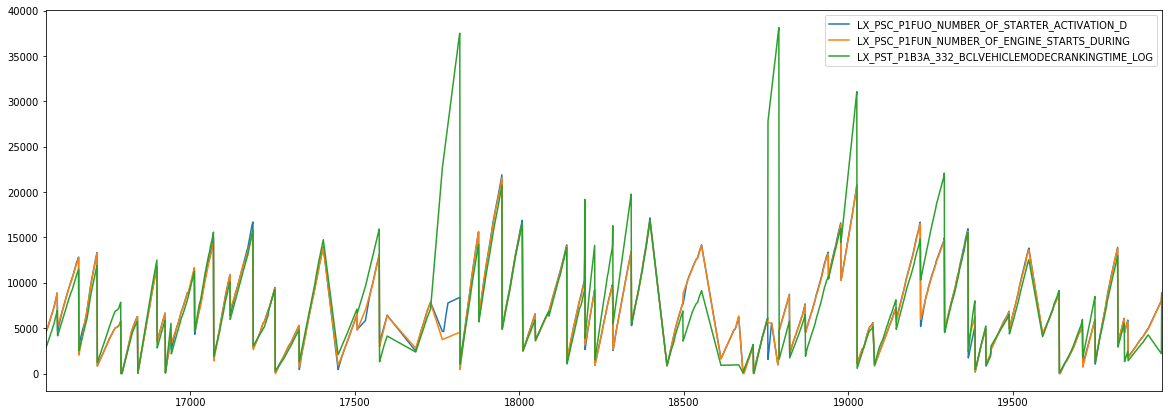

In [0]:
X_test.plot(figsize=(20,7))

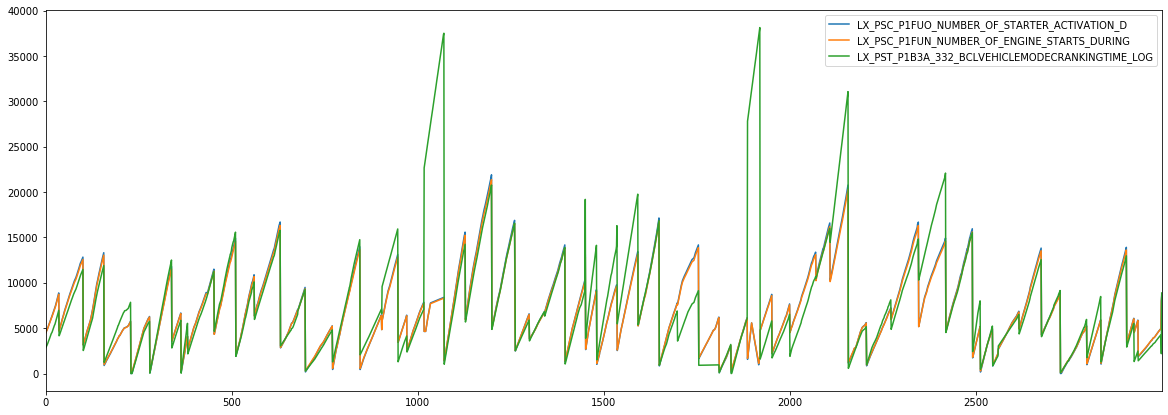

In [0]:
pred.plot(figsize=(20,7))

In [0]:
mean_absolute_error(X_test['LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING'].values, pred['LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING'].values)

190.89397383914113

In [0]:
mean_absolute_error(X_test['LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING'].values, pred['LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING'].values)

268.7050439247593

In [0]:
pred.isnull().sum().sort_values(ascending=False)


2    0
1    0
0    0
dtype: int64

In [0]:
test.shape

(2849, 3)